Main Page: https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data

In [89]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [4]:
%matplotlib inline

pd.set_option('display.expand_frame_repr', False)

In [5]:
train_file_path = '../../data/hp/train.csv'
test_file_path = '../../data/hp/test.csv'

In [57]:
dr = pd.read_csv(train_file_path)
test = pd.read_csv(test_file_path)

all_data = pd.concat((dr, test)).reset_index(drop=True)

In [367]:
dr.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [31]:
c_id = ['Id']
c_cat = ['MSZoning', 'MSSubClass', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 
         'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 
         'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond',
        'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating',
        'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'PavedDrive', 
         'MiscVal', 'SaleType', 'SaleCondition', 'Street']
c_num = ['LotArea', 'BedroomAbvGr', 'PoolArea', 'Fireplaces',
         'YearBuilt', 'TotRmsAbvGrd', 'BsmtFullBath', 'EnclosedPorch', '3SsnPorch',
         'FullBath', 'BsmtHalfBath', 'HalfBath', 'OpenPorchSF', 'ScreenPorch',
         '1stFlrSF', '2ndFlrSF', 'BsmtUnfSF', 'YrSold', 'MoSold',
         'KitchenAbvGr', 'GarageCars', 'LotFrontage', 'LowQualFinSF', 'YearRemodAdd',
         'GarageArea', 'BsmtFinSF1', 'GrLivArea', 'BsmtFinSF2', 'WoodDeckSF', 'TotalBsmtSF']
c_ign = ['PoolQC', 'Fence', 'MiscFeature', 'FireplaceQu', 'Alley', 'GarageYrBlt', 'Utilities',
           'MasVnrArea', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']
c_fet = list(set(c_cat) | set(c_num) - set(c_ign))

In [377]:
dr.describe()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,enet_result,xgb_result,y_pred
count,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,...,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000
mean,730.216049,4.165295,3.028807,70.114883,10505.768861,0.995885,1.945130,2.777092,0.000686,3.023320,...,2.382030,0.290809,6.325103,2007.816872,7.512346,3.772977,180140.566529,180140.566529,180139.890871,180140.566529
std,421.731396,4.164692,0.632450,22.305939,9983.038856,0.064040,1.408283,0.708103,0.026189,1.619885,...,37.509607,1.794275,2.701826,1.328662,1.553060,1.097153,76645.846478,70739.711221,76161.137883,76565.002353
min,1.000000,0.000000,0.000000,21.000000,1300.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,2006.000000,0.000000,0.000000,34900.000000,24286.302401,35545.445312,35207.921948
25%,365.250000,0.000000,3.000000,60.000000,7544.500000,1.000000,0.000000,3.000000,0.000000,2.000000,...,0.000000,0.000000,5.000000,2007.000000,8.000000,4.000000,129925.000000,128374.032059,130431.003906,130290.561796
50%,730.500000,4.000000,3.000000,70.000000,9475.000000,1.000000,3.000000,3.000000,0.000000,4.000000,...,0.000000,0.000000,6.000000,2008.000000,8.000000,4.000000,163000.000000,169522.031074,161599.320312,161336.307530
75%,1094.750000,6.000000,3.000000,80.000000,11600.000000,1.000000,3.000000,3.000000,0.000000,4.000000,...,0.000000,0.000000,8.000000,2009.000000,8.000000,4.000000,213875.000000,222355.427052,213089.863281,212586.405242
max,1460.000000,14.000000,4.000000,313.000000,215245.000000,1.000000,3.000000,3.000000,1.000000,4.000000,...,738.000000,20.000000,12.000000,2010.000000,8.000000,5.000000,625000.000000,530460.199663,620237.062500,627987.099009


In [26]:
def do_fill_na(all_data):
    all_data["LotFrontage"] = all_data.groupby("Neighborhood")["LotFrontage"].transform(
        lambda x: x.fillna(x.median()))
    
    for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
        all_data[col] = all_data[col].fillna(0)

    for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
        all_data[col] = all_data[col].fillna(0)

    for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
        all_data[col] = all_data[col].fillna('None')

    all_data["MasVnrType"] = all_data["MasVnrType"].fillna("None")
    all_data["MasVnrArea"] = all_data["MasVnrArea"].fillna(0)

    all_data["Functional"] = all_data["Functional"].fillna("Typ")
    
    #'MSZoning missing data '
    all_data['MSZoning'] = all_data['MSZoning'].fillna(all_data['MSZoning'].mode()[0])

    #'Electrical'
    all_data['Electrical'] = all_data['Electrical'].fillna(all_data['Electrical'].mode()[0])

    all_data['KitchenQual'] = all_data['KitchenQual'].fillna(all_data['KitchenQual'].mode()[0])

    all_data['Exterior1st'] = all_data['Exterior1st'].fillna(all_data['Exterior1st'].mode()[0])
    all_data['Exterior2nd'] = all_data['Exterior2nd'].fillna(all_data['Exterior2nd'].mode()[0])

    all_data['SaleType'] = all_data['SaleType'].fillna(all_data['SaleType'].mode()[0])

    all_data['MSSubClass'] = all_data['MSSubClass'].fillna("None")
    return all_data

In [238]:
# all data use for handling missing data
fill_na(dr)

null_count = all_data[list(set(c_cat) - set(c_ign))].isnull().sum()
null_count[null_count > 0].sort_values()

Series([], dtype: int64)

In [75]:
def do_cat2num(dr, columns):
    # convert all cat column to numeric type
    for col_name in columns:
        dr[col_name] = dr[col_name].astype('category')
        dr[col_name] = dr[col_name].cat.codes
    return dr

In [59]:
import seaborn as sns

In [60]:
sns.set(style="whitegrid", color_codes=True)

In [61]:
from scipy.stats import norm, skew

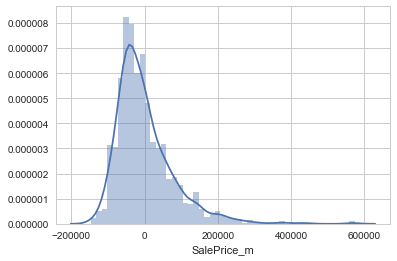

In [62]:
# Sale Price Distribution
(m, sigma) = norm.fit(dr['SalePrice'])
dr = dr.assign(SalePrice_m= lambda x: x['SalePrice']-m)
sns.distplot(dr['SalePrice_m'])

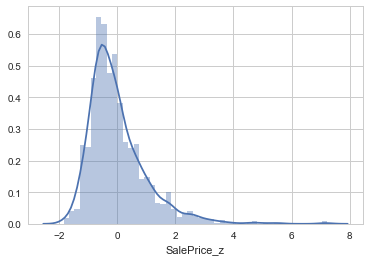

In [63]:
dr = dr.assign(SalePrice_z=lambda r: (r['SalePrice'] - m)/sigma)
sns.distplot(dr['SalePrice_z'])

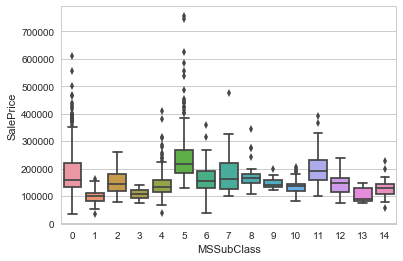

In [15]:
# Display MSSubClass vs SalePrice
sns.boxplot(x="MSSubClass", y="SalePrice", data=dr)

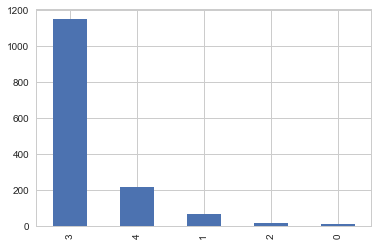

In [20]:
# Show different MSZoning value count
dr['MSZoning'].value_counts().plot(kind='bar')

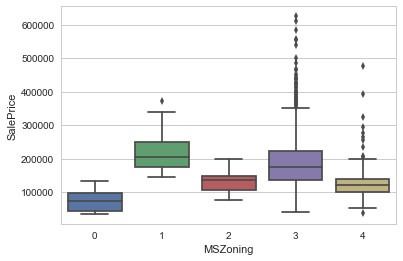

In [372]:
sns.boxplot(x="MSZoning", y="SalePrice", data=dr)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
691,692,5,3,104.0,21535,1,-1,0,3,0,...,0,-1,-1,-1,0,1,2007,8,4,755000
1182,1183,5,3,160.0,15623,1,-1,0,3,0,...,555,0,2,-1,0,7,2007,8,0,745000


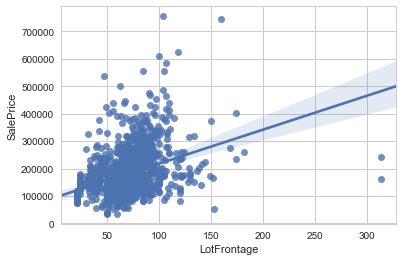

In [72]:
# Display LogFrontage vs SalePrice
sns.regplot(x="LotFrontage", y="SalePrice", data=dr)

dr.query('LotFrontage > 250')
dr.query('SalePrice > 700000').query('LotFrontage < 200')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
691,692,5,3,104.0,21535,1,-1,0,3,0,...,0,-1,-1,-1,0,1,2007,8,4,755000
1182,1183,5,3,160.0,15623,1,-1,0,3,0,...,555,0,2,-1,0,7,2007,8,0,745000


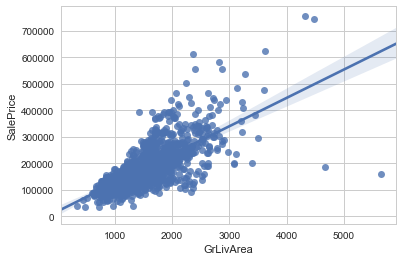

In [73]:
# Display GrLivArea vs SalePrice

sns.regplot(x="GrLivArea", y="SalePrice", data=dr)

dr.query('GrLivArea > 4500')
dr.query('GrLivArea > 4000').query('SalePrice > 700000')

In [198]:
def do_drop(t):
    # drop outlier.
    t = t.drop(t[(train['GrLivArea']>4000) & (t['SalePrice']<300000)].index)
    return t

### Error Function

In [112]:
# rmse to rmsle do improve accuracy
def do_rmse(predictions, targets):
    return np.sqrt(((predictions.values - targets.values) ** 2).mean())

### Base Models Selection

In [65]:
from sklearn.ensemble import RandomForestRegressor
from sklearn import svm
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error

In [94]:
# dr['enet_result']
def do_log_y(dr):
    return dr.assign(SalePrice_log = lambda x: np.log(x['SalePrice']))

In [119]:
def do_rmse_cv(model, t_t, t_y):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(t_t.values)
    rmse= -cross_val_score(model, t_t.values, t_y.values, scoring="neg_mean_squared_error", cv = kf)
    return(rmse)

#### Basic Model: Elastic Net

In [76]:
n_folds = 5
y_column = ['SalePrice']
dr = do_fill_na(dr)
dr = do_cat2num(dr, c_cat)

In [93]:
from sklearn.linear_model import ElasticNet

In [123]:
dr['enet_result_log'] = pd.Series(None, index=dr.index)
dr['enet_result'] = pd.Series(None, index=dr.index)
dr = do_log_y(dr)
y_column = ['SalePrice_log']

kf = KFold(n_splits=n_folds)
for train_index, test_index in kf.split(dr):
    enet = ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3)
    enet.fit(dr[c_fet].iloc[train_index], dr[y_column].iloc[train_index])
    enet_result = pd.DataFrame(enet.predict(dr[c_fet].iloc[test_index]), columns = ['enet_result_log'], index=test_index)
    dr.update(enet_result, raise_conflict=True)
    
do_rmse(dr[y_column], dr['enet_result_log'])
do_rmse_cv(ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3), dr[c_fet], dr['SalePrice_log']).mean()


/usr/local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/usr/local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/usr/local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/usr/local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of

0.023240792825660186

0.55076943579734061

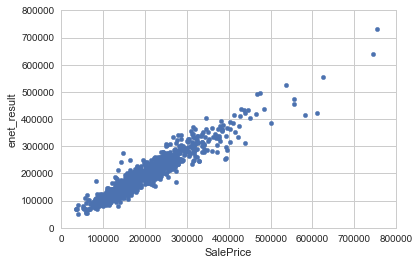

In [130]:
dr['enet_result'] = np.exp(dr['enet_result_log'])
dr.plot.scatter(x='SalePrice', y='enet_result', ylim=[0, 800000], xlim=[0,800000])
do_rmse(dr[y_column], dr['enet_result_log']).mean()

In [124]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3))
do_rmse_cv(ENet, dr[c_fet], dr['SalePrice_log']).mean()

0.023046117850669658

#### Basic Model: xgb

In [81]:
import xgboost as xgb

In [126]:
dr['xgb_result_log'] = pd.Series(None, index=dr.index)
dr['xgb_result'] = pd.Series(None, index=dr.index)
y_column = ['SalePrice_log']
r_column = ['xgb_result_log']

n_folds = 5
kf = KFold(n_splits=n_folds)
for train_index, test_index in kf.split(dr):
    model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1)
    model_xgb.fit(dr[c_fet].iloc[train_index], dr[y_column].iloc[train_index])
    xgb_result = pd.DataFrame(model_xgb.predict(dr[c_fet].iloc[test_index]), columns = r_column, index=test_index)
    dr.update(xgb_result, raise_conflict=True)

0.0032228827748290874

0.12357970093642533

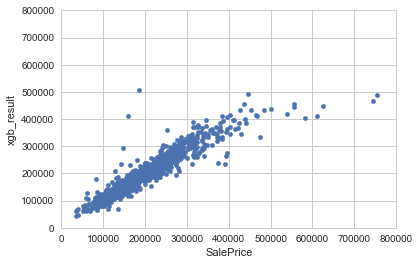

In [131]:
dr['xgb_result'] = np.exp(dr[r_column])
dr.plot.scatter(x='SalePrice', y='xgb_result', ylim=[0, 800000], xlim=[0,800000])
do_rmse(dr[y_column], dr[r_column]).mean()

#### Drop Outlier

In [232]:
t = dr.copy()
t = do_drop(t)
t.to_csv('drop_outlier.train', index=False)
t = pd.read_csv('drop_outlier.train')

In [233]:
t['xgb_result_log'] = pd.Series(None, index=t.index)
t['xgb_result'] = pd.Series(None, index=t.index)
y_column = ['SalePrice_log']
r_column = ['xgb_result_log']

n_folds = 5
kf = KFold(n_splits=n_folds)
for train_index, test_index in kf.split(t):
    model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1)
    model_xgb.fit(t[c_fet].iloc[train_index], t[y_column].iloc[train_index])
    xgb_result = pd.DataFrame(model_xgb.predict(t[c_fet].iloc[test_index]), columns = r_column, index=test_index)
    t.update(xgb_result, raise_conflict=True)

0.080869778161664199

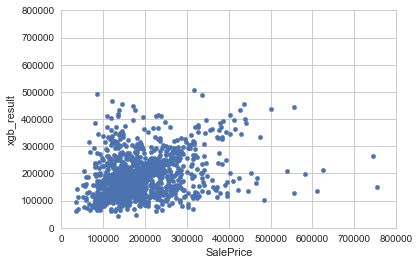

In [252]:
t['xgb_result'] = np.exp(dr[r_column])
t.plot.scatter(x='SalePrice', y='xgb_result', ylim=[0, 800000], xlim=[0,800000])
do_rmse(t[y_column], t[r_column]).mean()

#### Base Model: KernelRidge

In [86]:
from sklearn.kernel_ridge import KernelRidge

In [87]:
krr = KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)

#### Base Model: GradientBoostingRegressor

In [33]:
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor

In [ ]:
Gbr_model = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)

### Stacking Model

In [194]:
from sklearn.linear_model import Lasso

meta_col = ['enet_result', 'xgb_result']

In [198]:
dr['y_pred'] = pd.Series(None, index=dr.index)
n_folds = 5
kf = KFold(n_splits=n_folds)
for train_index, test_index in kf.split(dr):
    lasso = Lasso(alpha =0.0005, random_state=1)
    lasso.fit(dr[meta_col].iloc[train_index], dr[y_column].iloc[train_index])
    
    y_pred = pd.DataFrame(lasso.predict(dr[meta_col].iloc[test_index]), columns = ['y_pred'], index=test_index)
    dr.update(y_pred, raise_conflict=True)

ValueError: Data overlaps.

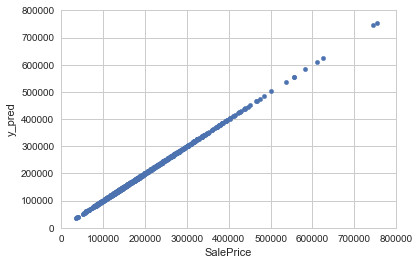

In [197]:
dr.plot.scatter(x='SalePrice', y='y_pred', ylim=[0, 800000], xlim=[0,800000])

### Trainning Model

In [348]:
enet = ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3)
enet.fit(dr[fet_c], dr[y_column])

/usr/local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


ElasticNet(alpha=0.0005, copy_X=True, fit_intercept=True, l1_ratio=0.9,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=3, selection='cyclic', tol=0.0001, warm_start=False)

In [349]:
model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1)
model_xgb.fit(dr[fet_c], dr[y_column])

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.4603, gamma=0.0468, learning_rate=0.05,
       max_delta_step=0, max_depth=3, min_child_weight=1.7817,
       missing=None, n_estimators=2200, n_jobs=1, nthread=-1,
       objective='reg:linear', random_state=7, reg_alpha=0.464,
       reg_lambda=0.8571, scale_pos_weight=1, seed=None, silent=1,
       subsample=0.5213)

In [351]:
enet_result = pd.DataFrame(enet.predict(dr[fet_c]), columns = ['enet_result'], index=dr.index)
xgb_result = pd.DataFrame(model_xgb.predict(dr[fet_c]), columns=['xgb_result'], index=dr.index)

dr.update(enet_result, raise_conflict=True)
dr.update(xgb_result, raise_conflict=True)

In [352]:
lasso = Lasso(alpha =0.0005, random_state=1)
lasso.fit(dr[meta_col], dr[y_column])
# y_pred = pd.DataFrame(lasso.)

Lasso(alpha=0.0005, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=1,
   selection='cyclic', tol=0.0001, warm_start=False)

In [353]:
y_pred = pd.DataFrame(lasso.predict(dr[meta_col]), columns=['y_pred'], index=dr.index)

dr.update(y_pred, raise_conflict=True)

#### XGB Trainning Model

In [244]:
t = pd.read_csv('drop_outlier.train')
t['xgb_result_log'] = pd.Series(None, index=t.index)
t['xgb_result'] = pd.Series(None, index=t.index)
y_column = ['SalePrice_log']
r_column = ['xgb_result_log']


model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1)
model_xgb.fit(t[c_fet], t[y_column])
xgb_result = pd.DataFrame(model_xgb.predict(t[c_fet]), columns = r_column)
t.update(xgb_result, raise_conflict=True)

In [251]:
# rmse to rmsle do improve accuracy
do_rmse(t[y_column], t[r_column]).mean()

0.080869778161664199

### Make Prediction

In [246]:
test = pd.read_csv(test_file_path)
test = do_fill_na(test)
test = do_cat2num(test, c_cat)

In [247]:
# result = sigma * (model_xgb.predict(test[c_fet])) + m
result = np.exp(model_xgb.predict(test[c_fet]))
result

array([ 123379.3046875,  162972.546875 ,  183229.546875 , ...,
        159675.03125  ,  121379.515625 ,  219772.9375   ], dtype=float32)

In [231]:
# write file for submission
submission = pd.DataFrame()
sub['Id'] = test_ID
sub['SalePrice'] = ensemble
sub.to_csv('result.csv',index=False)

NameError: name 'test_ID' is not defined

In [248]:
with open('result.csv', 'w') as f:
    f.write("Id,SalePrice\r\n")
    for index, row in enumerate(result):
        f.write("%s,%s\r\n" % (index+1461, row))